In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# lect 159, 160

In [2]:
dataset = pd.read_csv(r'C:\Users\Welcome\Downloads\algerian_forest_dataset\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
# data cleaning
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
dataset.loc[:122, "Region"]=0
dataset.loc[122:, "Region"]=1
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
dataset[['Region']] = dataset[['Region']].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [21]:
dataset = dataset.dropna().reset_index(drop=True)

In [22]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [23]:
# Remove the 122nd entry row
dataset = dataset.drop(122).reset_index(drop=True)


In [24]:
# fix spaces in column names
dataset.columns = dataset.columns.str.strip()
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
dataset[['day','month','year', 'Temperature', 'RH', 'Ws']] = dataset[['day','month','year', 'Temperature', 'RH', 'Ws']].astype(int)

In [27]:
objects= [features for features in dataset.columns if dataset[features].dtypes=='O']
for i in objects:
    if i!= 'Classes':
        dataset[i] = dataset[i].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [28]:
df=dataset.drop(['day','month','year'],axis=1)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             78
not fire         41
not fire          1
not fire          1
Name: count, dtype: int64

In [30]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [31]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [32]:
#independent and dependent features
X = df.drop('FWI',axis=1)
y=df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
#Train test split
from sklearn.model_selection import train_test_split

In [34]:
dataset.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [35]:
df = dataset.drop(['day','month','year'],axis=1)

In [36]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [38]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [40]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

C:\Users\Welcome\AppData\Local\Temp\ipykernel_9452\2562866405.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


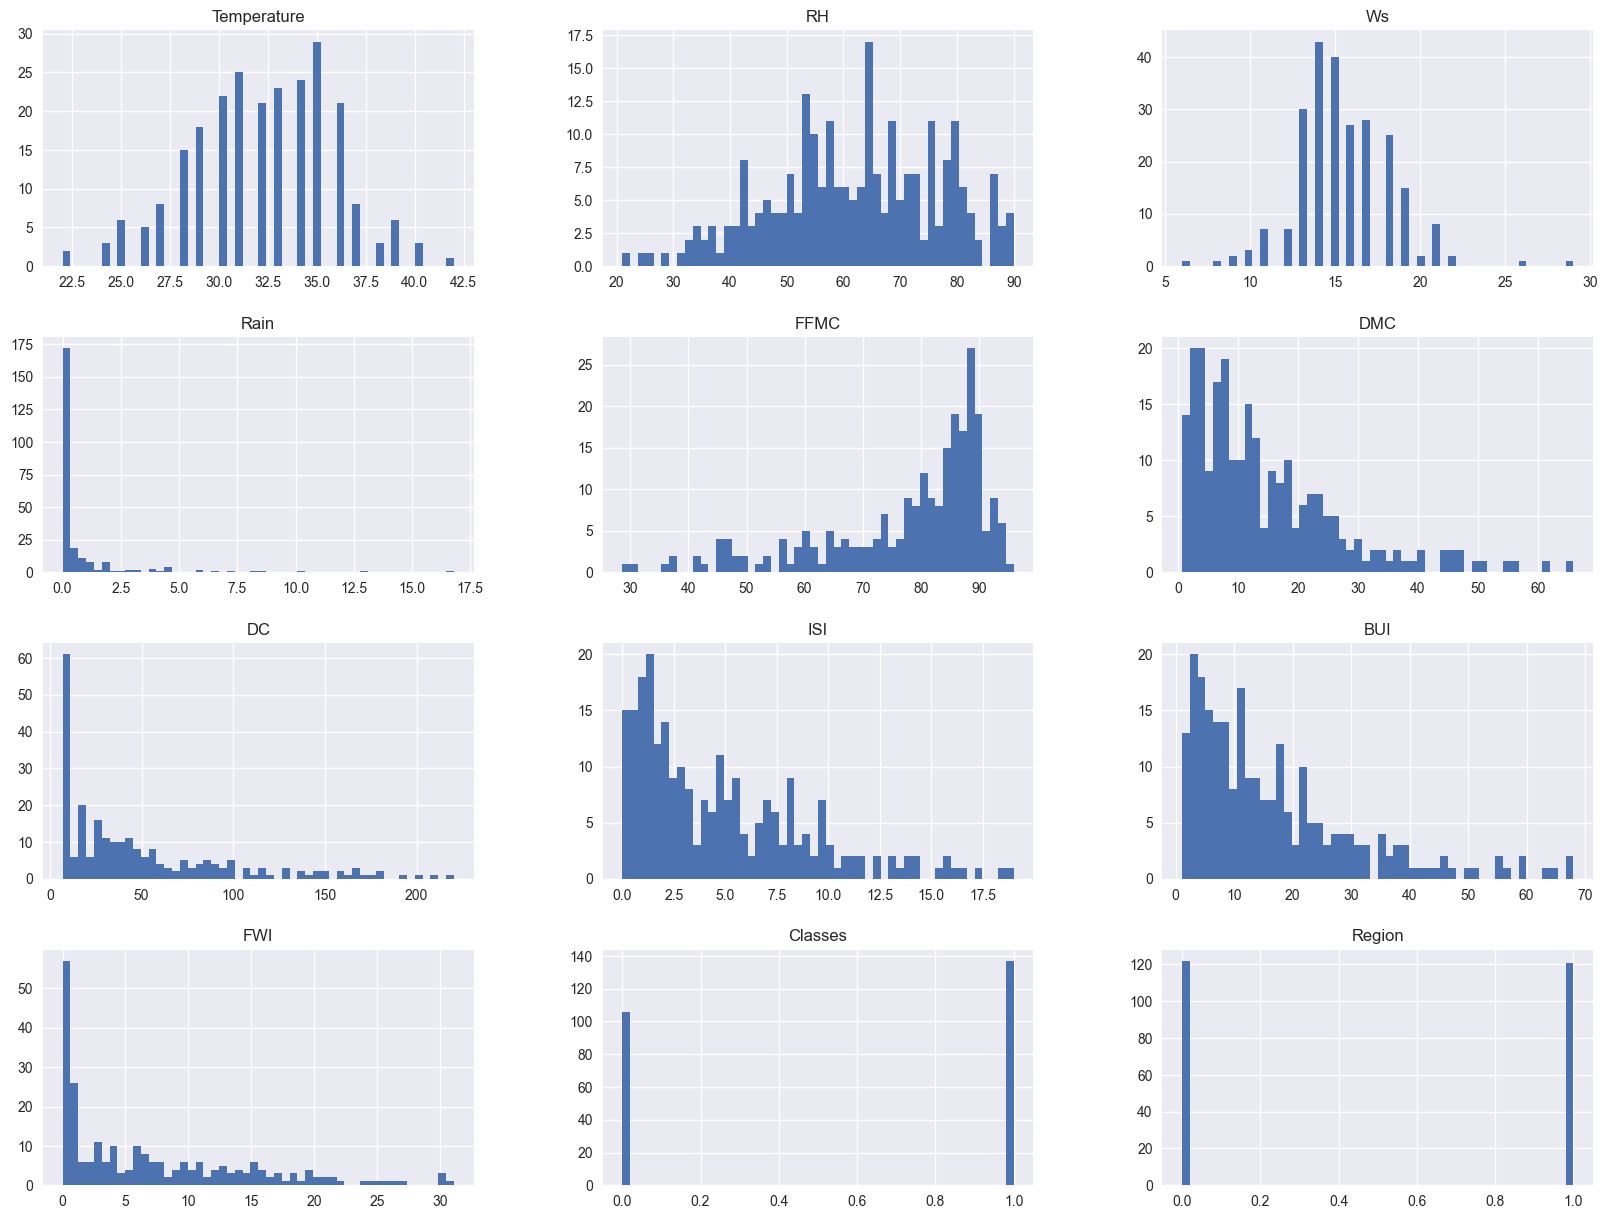

In [43]:
import seaborn as sns
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15))
plt.show()

([<matplotlib.patches.Wedge at 0x1e8d5e483d0>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'Fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'Not Fire')])

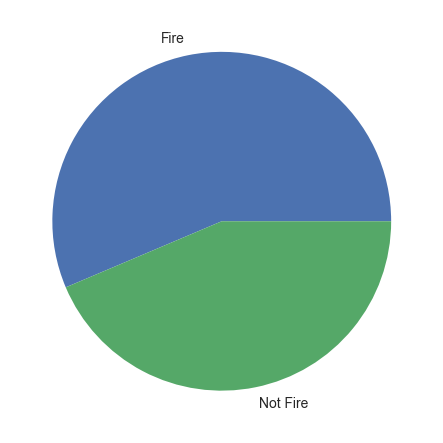

In [45]:
# plotting piechart
percentage = df['Classes'].value_counts(normalize=True)*100
classlabels = ["Fire","Not Fire"]
#plt.figure(figsize(12,7))
plt.pie(percentage, labels=classlabels)

<Axes: xlabel='month', ylabel='count'>

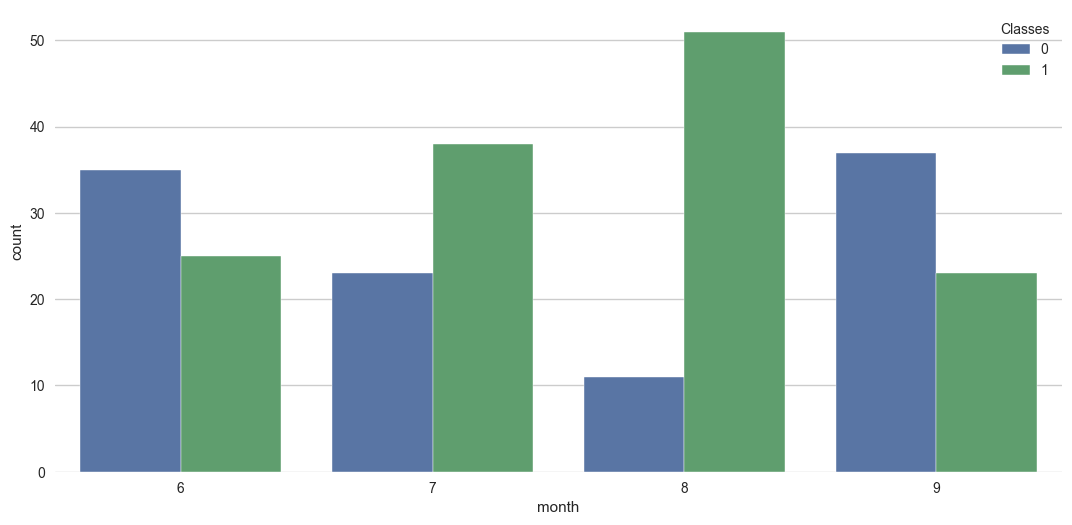

In [52]:
# Monthly Fire Analysis 
df_copy = dataset
df_copy['Classes']= np.where(dataset['Classes'].str.contains('not fire'),0,1)
dftemp = df_copy.loc[df_copy['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x= 'month', hue='Classes', data=df_copy)

In [54]:
# Independent and dependent features : Model Training lect 161
X = df.drop('FWI',axis=1)
y = df['FWI']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [61]:
#Feature selection based on correlation
X_train.corr()  # if some features are highly positive correlated we can remove

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

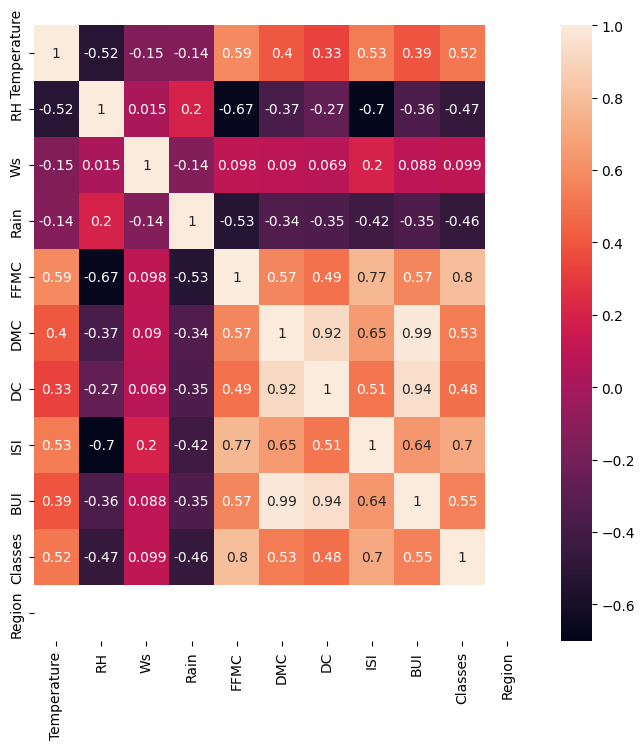

In [15]:
# check for multicollinearity, independnt feature should not be very correlated
import seaborn as sns
plt.figure(figsize=(8,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [62]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [67]:
corr_features=correlation(X_train, 0.90)
print(corr_features)
X_train.drop(corr_features, axis=1, inplace=True)

{'BUI'}


In [69]:
#drop features when correlation is > 0.85
#X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [70]:
#    Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_9452\1558595386.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: >

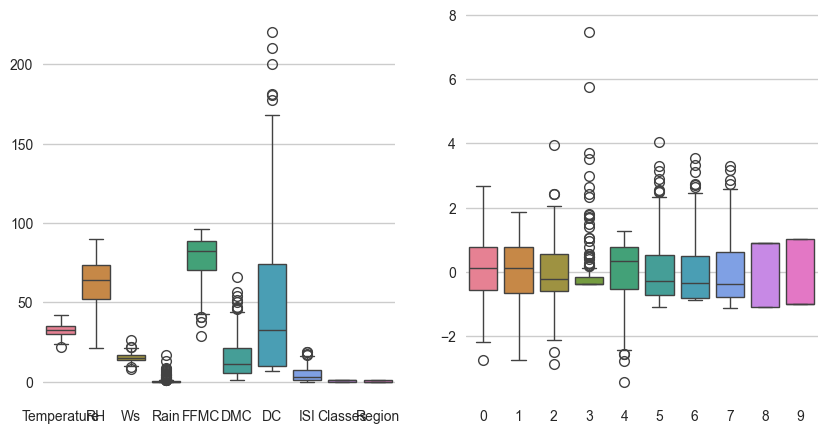

In [71]:
## Box plots to understand effect of standard scaler
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

Mean absolute error 0.5170107980662408
R2 Score 0.9830565611009445


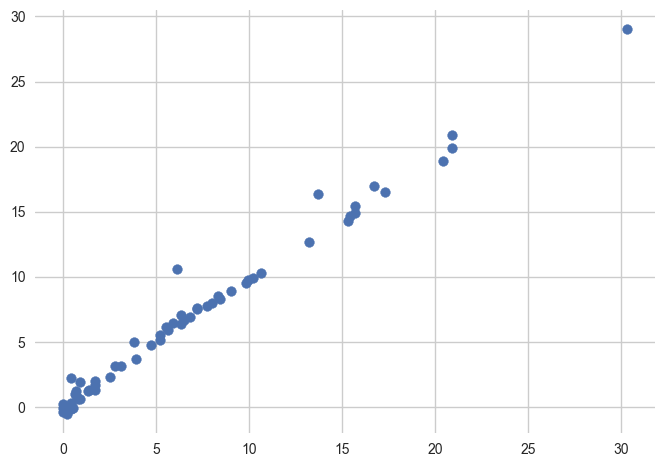

In [72]:
# Linear Regression Model : Lect 162, 163 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled) 
mae = mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test, y_pred)

Mean absolute error 1.1257992990774726
R2 Score 0.9498931628519822


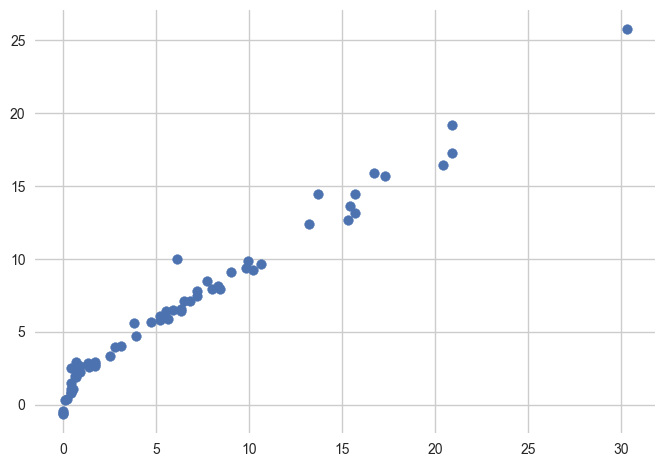

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso= Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled) 
mae = mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test, y_pred)

Mean absolute error 0.5292519766274832
R2 Score 0.9824051915524249


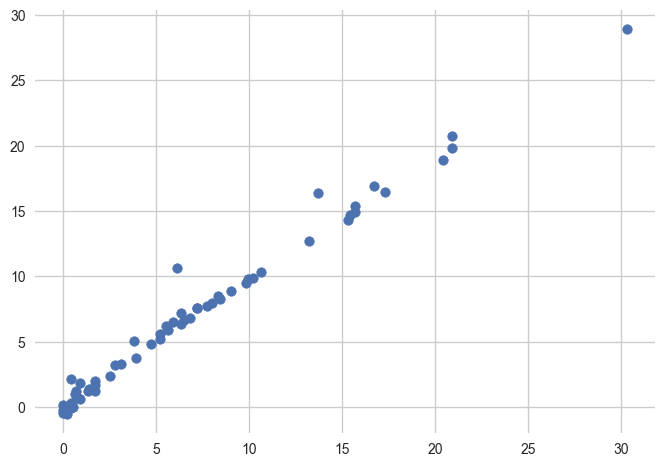

In [74]:
# Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge= Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled) 
mae = mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test, y_pred)

Mean absolute error 1.9014310977912219
R2 Score 0.8869253720831716


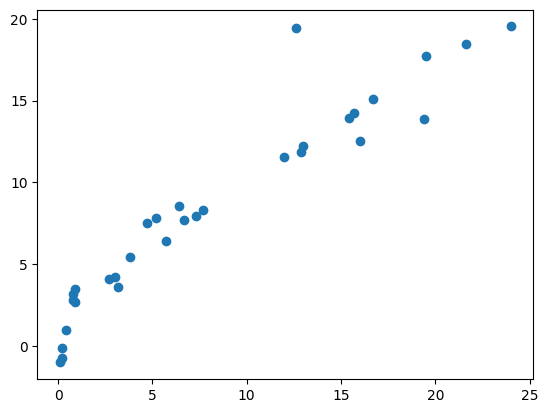

In [26]:
# Elastic Net Model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic= ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled) 
mae = mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test, y_pred)

In [ ]:
# Cross Validation: Dataset divided into train and test. Train data divided into train and validation. Train data is used to 
# training the model. With validation data we perform hyper-parameter tuning. When CV = 5 and there are 1000 data points, so 1000/5 = 200
# so for CV=1, first 200 points will be for validation, and 800 will be training data.  

In [81]:
#Cross Validation Lasso 
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [80]:
lassocv.alpha_

0.05725391318234408

In [83]:
ypred = lassocv.predict(X_test_scaled)
#plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print('R2 score', score)

Mean absolute error 0.5292519766274832
R2 score 0.9824051915524249
